In [1]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
csv = '/work/Mall_Customers.csv'
df =  pd.read_csv(csv)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [5]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

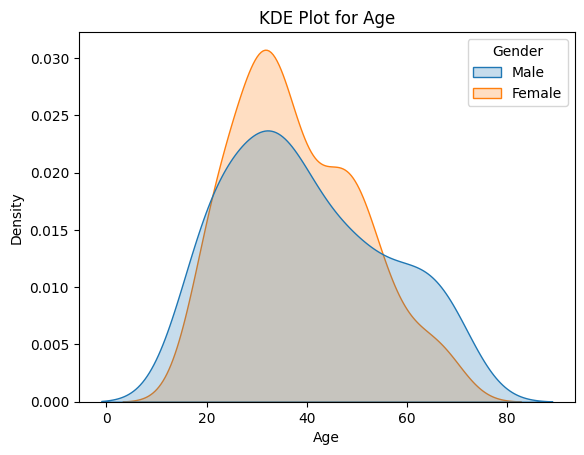

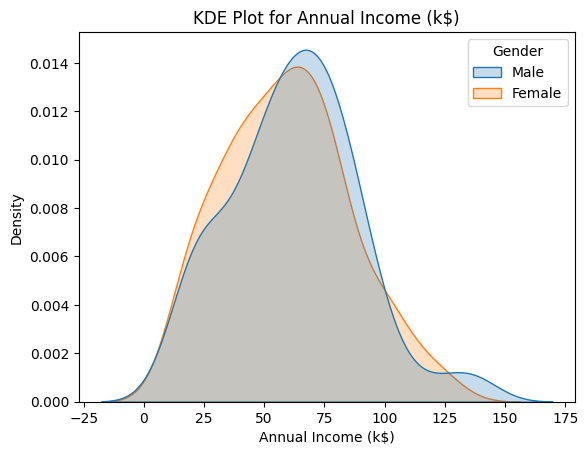

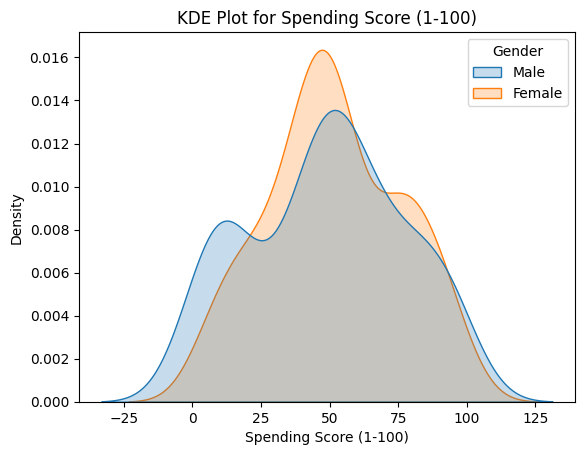

In [7]:
df.columns

columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for col in columns:
    sns.kdeplot(data=df, x=col, hue='Gender', common_norm=False, fill=True)
    plt.title(f'KDE Plot for {col}')
    plt.show()

# Bivariate Analysis

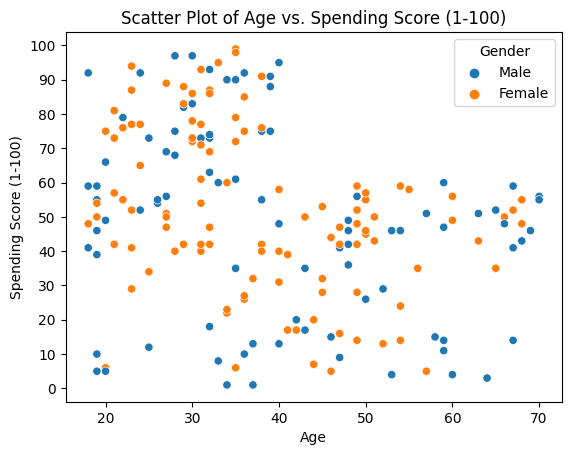

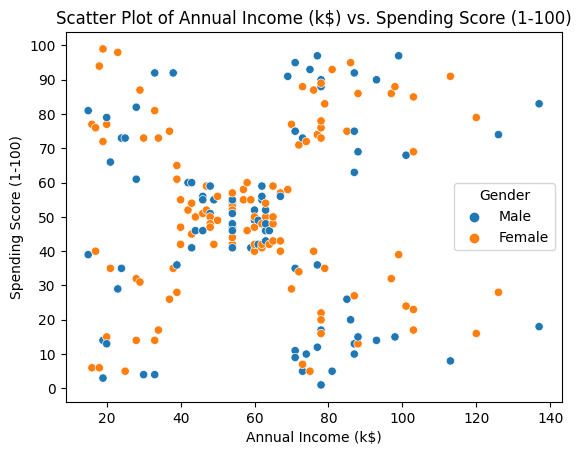

In [8]:
for col in columns:
    if col != 'Spending Score (1-100)':
        sns.scatterplot(data=df, x=col, y='Spending Score (1-100)', hue='Gender')
        plt.yticks(range(0, 101, 10))
        plt.title(f'Scatter Plot of {col} vs. Spending Score (1-100)')
        plt.show()

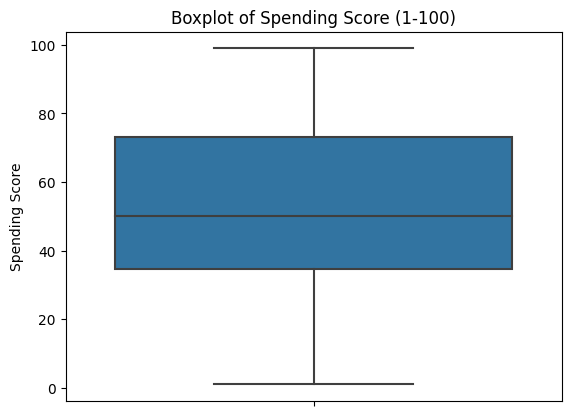

In [9]:
# check for outliers in spending score
sns.boxplot(data=df, y='Spending Score (1-100)', )
plt.ylabel('Spending Score')
plt.title('Boxplot of Spending Score (1-100)')
plt.show()

### Heat Map (Pearson correlation)

<AxesSubplot:>

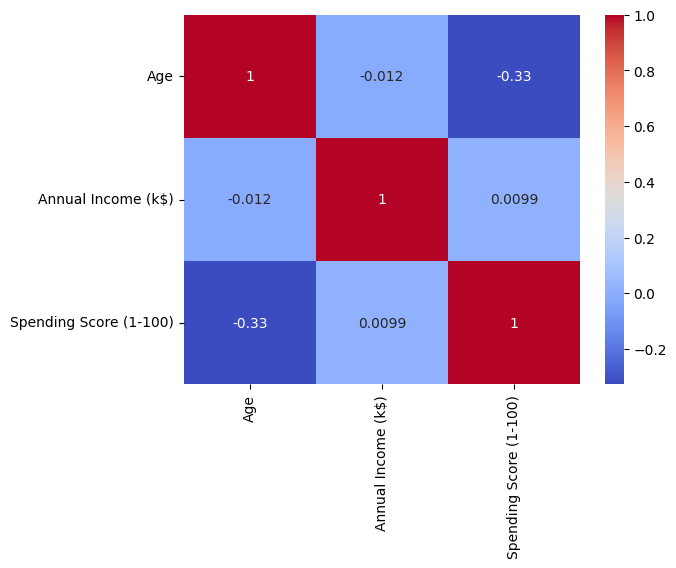

In [10]:
# df.corr()
sns.heatmap(df[columns].corr(),cmap='coolwarm', annot=True)

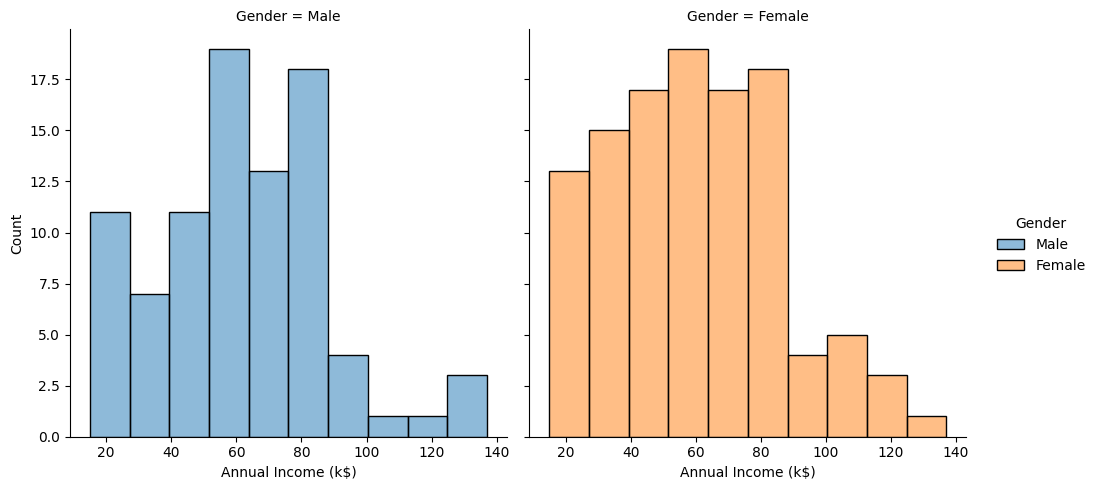

In [11]:
sns.displot(data=df, x='Annual Income (k$)', hue='Gender', col='Gender')
plt.show()

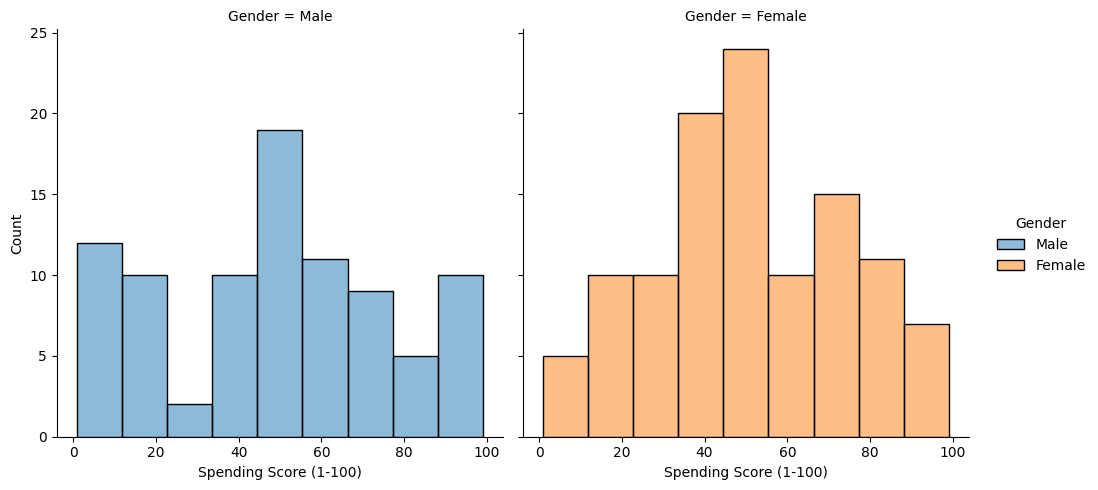

In [12]:
sns.displot(data=df, x='Spending Score (1-100)', hue='Gender', col='Gender')
plt.show()

I can see that customers with the highest spending score are less than 40 years old and can be put into two annual income categories <$40k and >$80k with a spending score >60. Customers withing the 40k & 70k bracket seem to be cluster around the midpoint of the spending score between 40 & 60.  After testing for significance between gender spending, the result shows There is no significant difference in spending scores between male and female customers.

### check for significant difference in spending between genders

In [13]:
# variance

df[columns].var()

Age                       195.133166
Annual Income (k$)        689.835578
Spending Score (1-100)    666.854271
dtype: float64

In [14]:
male_spending = df[df['Gender'] == 'Male']['Spending Score (1-100)']
female_spending = df[df['Gender'] == 'Female']['Spending Score (1-100)']

#independent t-test
t_statistic, p_value = ttest_ind(male_spending, female_spending)

# p-value
if p_value < 0.05:
    print(f't_statistic: {t_statistic}', '\n',f'p_value: {p_value}', "\n There is a significant difference in spending scores between male and female customers.")
else:
    print(f't_statistic: {t_statistic}', '\n',f'p_value: {p_value}',"\n There is no significant difference in spending scores between male and female customers.")


t_statistic: -0.8190464150660333 
 p_value: 0.4137446589852176 
 There is no significant difference in spending scores between male and female customers.


# Getting more info on the clusters

In [15]:
spending_score_bins = [0, 40, 70, 100]
spending_score_labels = ['Low', 'Average', 'High']

df['customer_value'] = pd.cut(df['Spending Score (1-100)'], bins=spending_score_bins, labels=spending_score_labels)

df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),customer_value
0,1,Male,19,15,39,Low
1,2,Male,21,15,81,High
2,3,Female,20,16,6,Low
3,4,Female,23,16,77,High
4,5,Female,31,17,40,Low


In [16]:
# Create a pivot table to summarize spending score data
pivot_table = df.groupby('customer_value').agg({'Spending Score (1-100)': ['sum', 'count']})
pivot_table.columns = ['Total Spending Score', 'Customer Count']
pivot_table.reset_index(inplace=True)

# Sort the pivot table by the 'customer_value' column
pivot_table = pivot_table.sort_values(by='customer_value')

pivot_table


,customer_value,Total Spending Score,Customer Count
0,Low,1269,63
1,Average,4283,83
2,High,4488,54


In [17]:
pivot_table.iloc[0][['Total Spending Score', 'Customer Count']] #low


Total Spending Score    1269
Customer Count            63
Name: 0, dtype: object

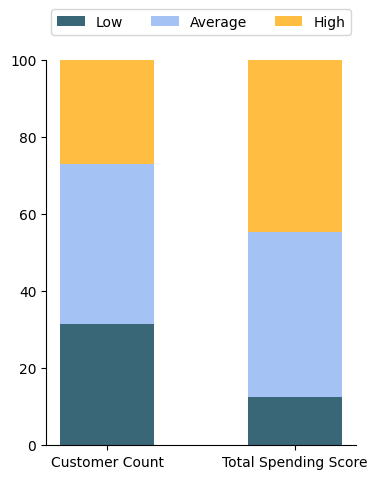

In [18]:
x = ['Customer Count', 'Total Spending Score']

# Extract the data for each 'customer_value' category
y1 = pivot_table.iloc[0][['Customer Count', 'Total Spending Score' ]]  # Low
y2 = pivot_table.iloc[1][['Customer Count', 'Total Spending Score' ]]  # Average
y3 = pivot_table.iloc[2][['Customer Count', 'Total Spending Score' ]]  # High

# total for each category
total_y = y1 + y2 + y3

# Normalize the data to percentages
y1_percentage = y1 / total_y * 100
y2_percentage = y2 / total_y * 100
y3_percentage = y3 / total_y * 100

# figure and axis
fig, ax = plt.subplots(figsize=(4, 5))
bar_width = 0.5

# colors for each 'customer_value' category
colors = ['#3A6777', '#A4C2F4', '#FFBE41']


# Plot
bar1 = ax.bar(x, y1_percentage, color=colors[0], width=bar_width, label='Low')
bar2 = ax.bar(x, y2_percentage, bottom=y1_percentage, color=colors[1], width=bar_width, label='Average')
bar3 = ax.bar(x, y3_percentage, bottom=y1_percentage + y2_percentage, width=bar_width, color=colors[2], label='High')

# Set the y-axis limits to 0-100%
ax.set_ylim(0, 100)

# # Adding percentages in the center of each bar
# for bar, percentage in zip([bar1, bar2, bar3], [y1_percentage, y2_percentage, y3_percentage]):
#     height_accumulated = 0  # Initialize accumulated height for each bar
#     for rect, percent in zip(bar, percentage):
#         height = rect.get_height()
#         ax.annotate(f'{percent:.1f}%',
#                     xy=(rect.get_x() + rect.get_width() / 2, height + height_accumulated),
#                     xytext=(0, 3),  # Adjust the vertical position of the text
#                     textcoords="offset points",
#                     ha='center', va='bottom', fontsize=10)
#         height_accumulated += height



# remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x-axis labels and title
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x)
ax.set_xlabel('')
ax.set_title('', y=1.15)

# Add a legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)

plt.show()


In [19]:
# df[df['customer_value'] == 'Low'].describe()

for val in df['customer_value'].unique():
    x = df[df['customer_value'] == val][columns].describe()
    print(f'Customer Value = {val} \n ',x, '\n\n')


Customer Value = Low 
               Age  Annual Income (k$)  Spending Score (1-100)
count  63.000000           63.000000               63.000000
mean   42.111111           64.095238               20.142857
std    12.044422           32.122605               12.065489
min    19.000000           15.000000                1.000000
25%    35.000000           31.500000               10.500000
50%    42.000000           73.000000               17.000000
75%    49.500000           86.500000               31.500000
max    67.000000          137.000000               40.000000 


Customer Value = High 
               Age  Annual Income (k$)  Spending Score (1-100)
count  54.000000           54.000000               54.000000
mean   30.240741           64.333333               83.111111
std     5.659973           32.383317                8.528900
min    18.000000           15.000000               71.000000
25%    27.250000           30.750000               75.000000
50%    30.500000           73.500

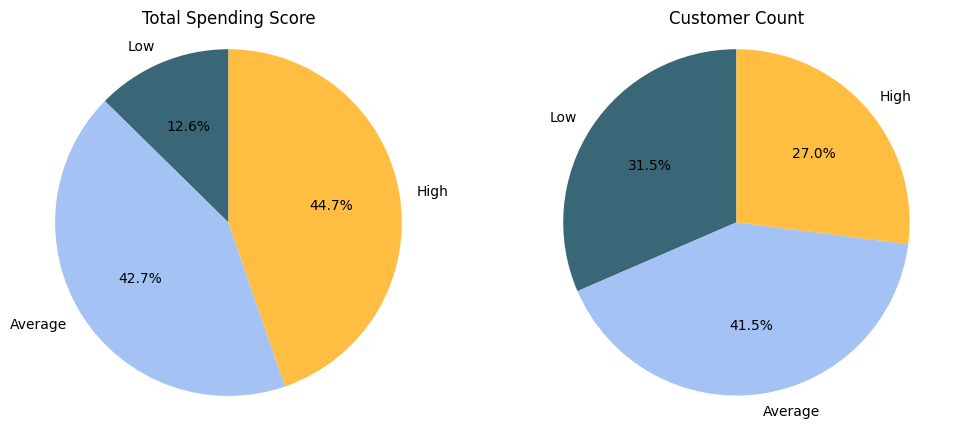

In [20]:
# Data
total_spending = pivot_table['Total Spending Score']
customer_count = pivot_table['Customer Count']
colors = ['#3A6777', '#A4C2F4', '#FFBE41']
labels = pivot_table['customer_value']

# Create figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot pie chart for Total Spending Score
ax[0].pie(total_spending, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Total Spending Score')

# Plot pie chart for Customer Count
ax[1].pie(customer_count, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Customer Count')

# Adjust aspect ratio to be equal so that it looks like a circle
ax[0].axis('equal')
ax[1].axis('equal')

plt.show()


In [21]:
annual_income_bins = [0, 40, 70, float('inf')] 
annual_income_labels = ['Low', 'Middle', 'High']

df['income_class'] = pd.cut(df['Annual Income (k$)'], bins=annual_income_bins, labels=annual_income_labels)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),customer_value,income_class
0,1,Male,19,15,39,Low,Low
1,2,Male,21,15,81,High,Low
2,3,Female,20,16,6,Low,Low
3,4,Female,23,16,77,High,Low
4,5,Female,31,17,40,Low,Low


In [22]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'customer_value', 'income_class'],
      dtype='object')

In [23]:
# Create a pivot table to count the number of people in each income class and customer value
income_pivot_table = df.groupby(['income_class', 'customer_value'])['CustomerID'].count().unstack(fill_value=0)

# Reset the index to make it look like a regular DataFrame
# income_pivot_table.reset_index(inplace=True)

# Rename the columns to remove the 'Customer ID' label
income_pivot_table.columns.name = None

# Print the pivot table
income_pivot_table

,Low,Average,High
income_class,,,
Low,23,8,19
Middle,3,71,2
High,37,4,33


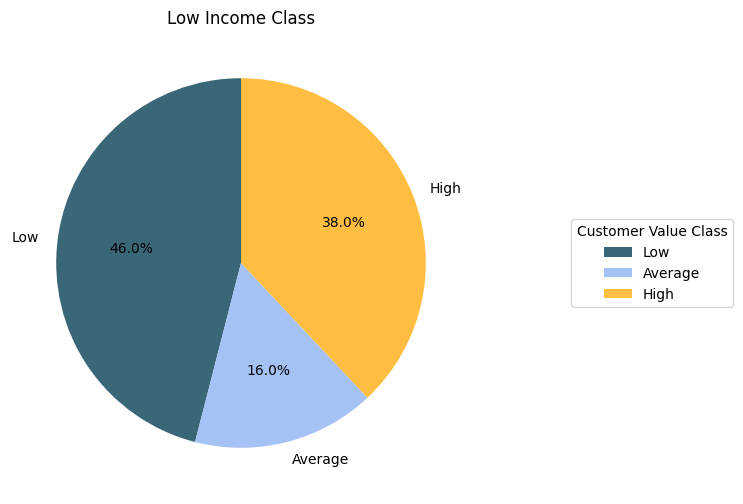

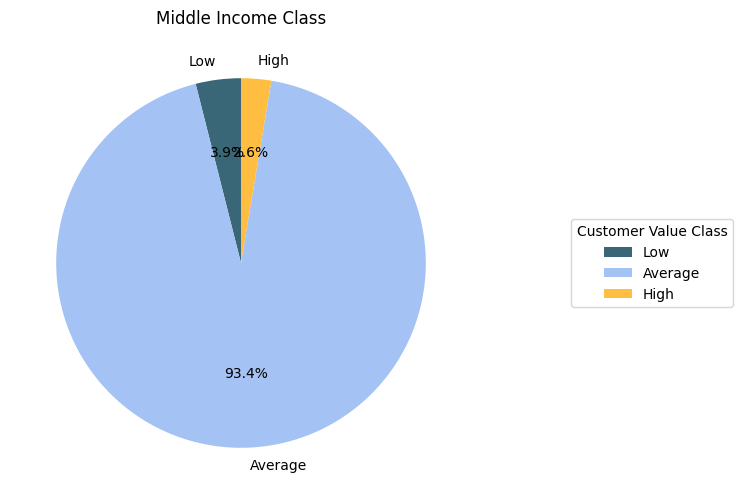

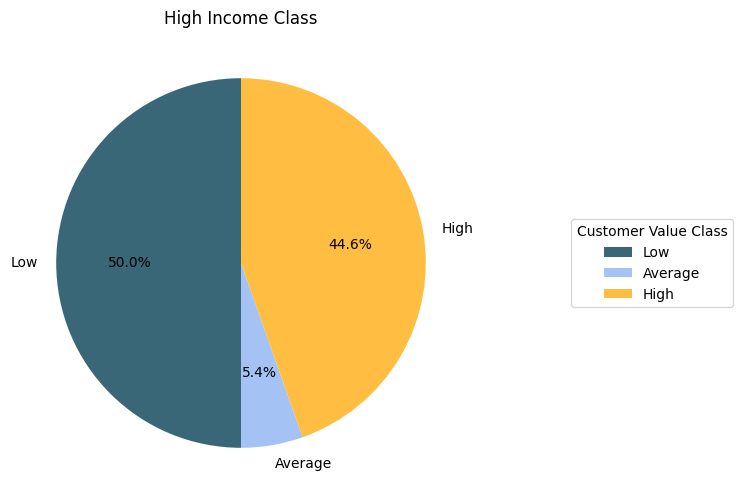

In [33]:
# Define labels for the legend based on your income classes
legend_labels = income_pivot_table.columns

for row in income_pivot_table.index:
    fig, ax = plt.subplots(figsize=(6, 6))
    wedges, texts, autotexts = ax.pie(income_pivot_table.loc[row], labels=income_pivot_table.columns, autopct='%1.1f%%', startangle=90, colors=colors)

    # Add a legend
    ax.legend(wedges, legend_labels, title="Customer Value Class", loc="center left", bbox_to_anchor=(1.2, 0.5))

    ax.set_title(f'{row} Income Class')

plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ea53a1dd-d66b-439d-82bb-de6ed93b2f51' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>